## House Price Project

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the training_set.csv

In [3]:
import pandas as pd
df = pd.read_csv('training_set.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Check Dataframe Details

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check Missing Value in Dataframe

In [6]:
m=df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## EDA

### Descriptive analytics

In [7]:
from PM2 import catconsep
cat,con=catconsep(df)

In [8]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [9]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [10]:
df[con].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [11]:
df[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

## Visualization

### Univeriate

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

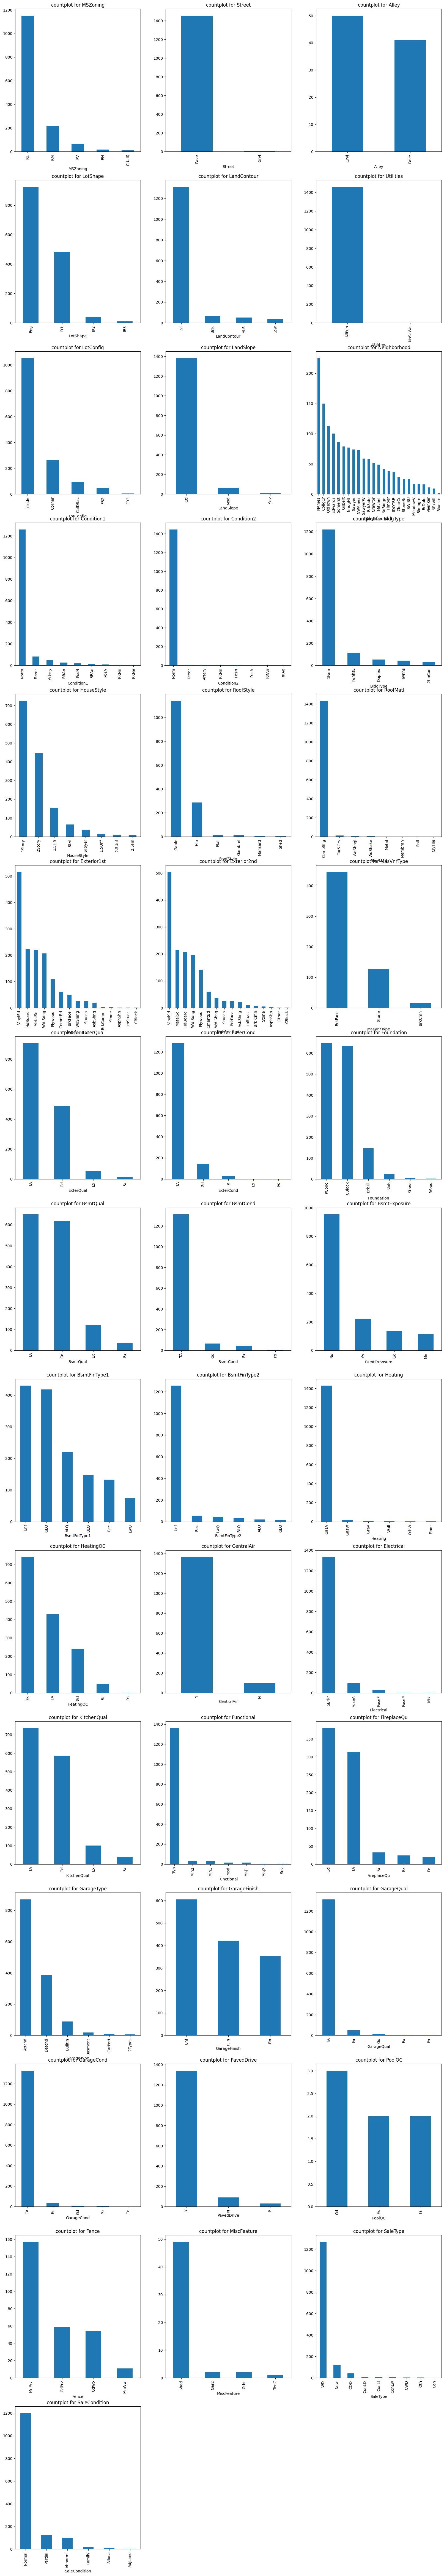

In [13]:
plt.figure(figsize=(20,120))
x=1
for i in cat:
    plt.subplot(15,3,x)
    x=x+1
    df[i].value_counts().plot(kind='bar',title=f'countplot for {i}')
plt.show()

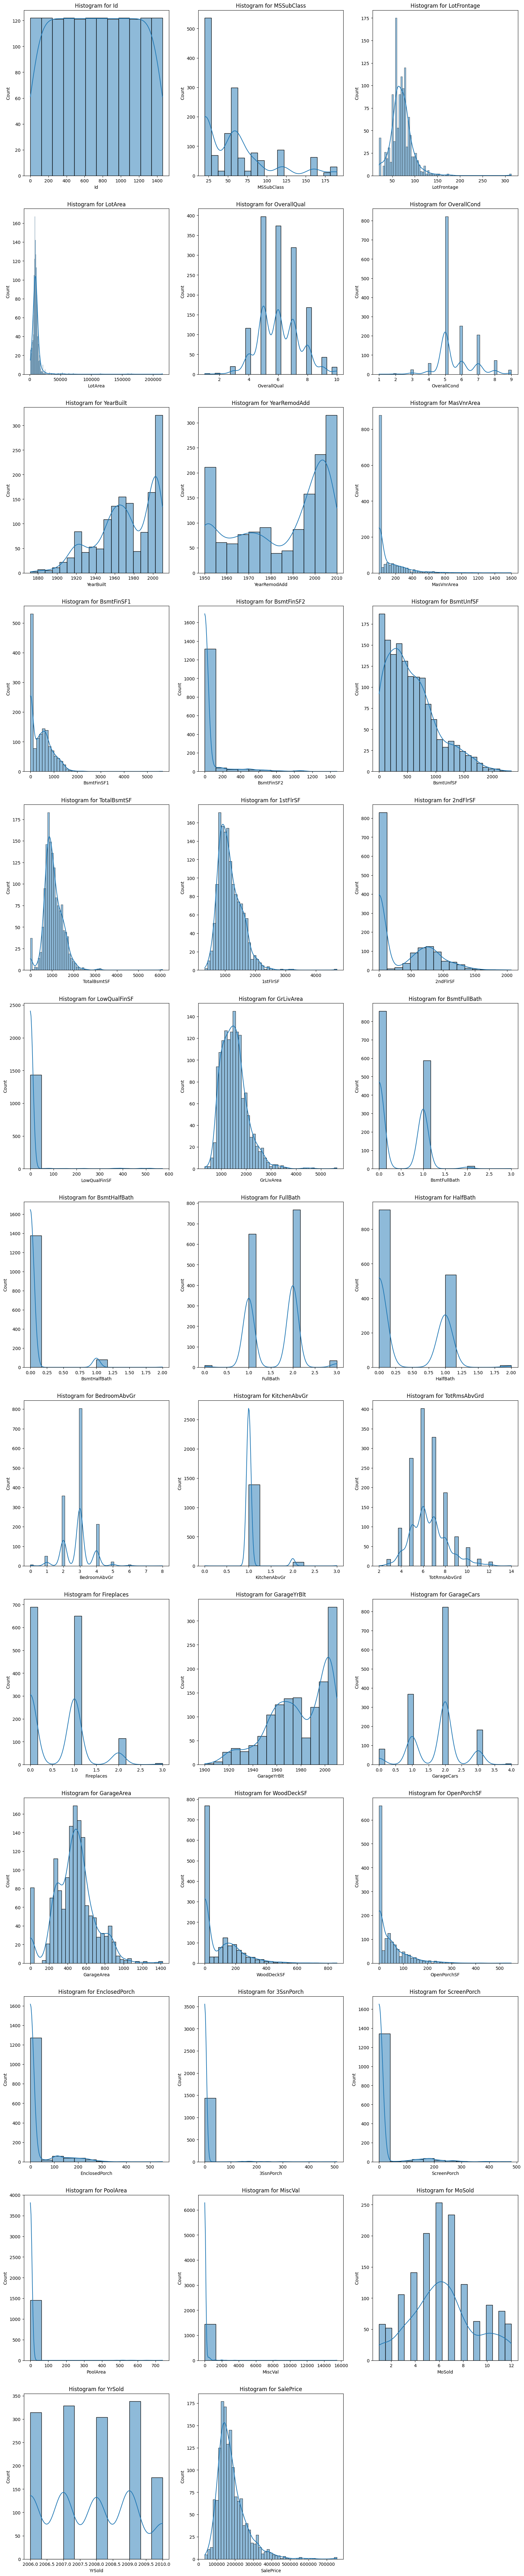

In [14]:
plt.figure(figsize=(20,120))
x=1
for i in con:
    plt.subplot(15,3,x)
    x=x+1
    sns.histplot(data=df,kde=True,x=i)
    plt.title(f'Histogram for {i}')
plt.show()

## Bivariate Analysis

### Continuous vs Continuous Scatterplot

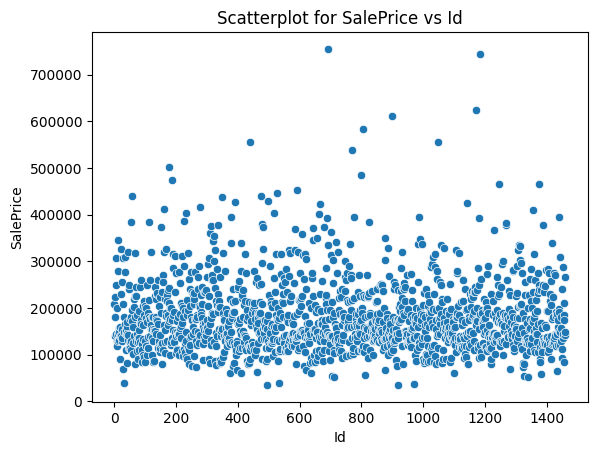

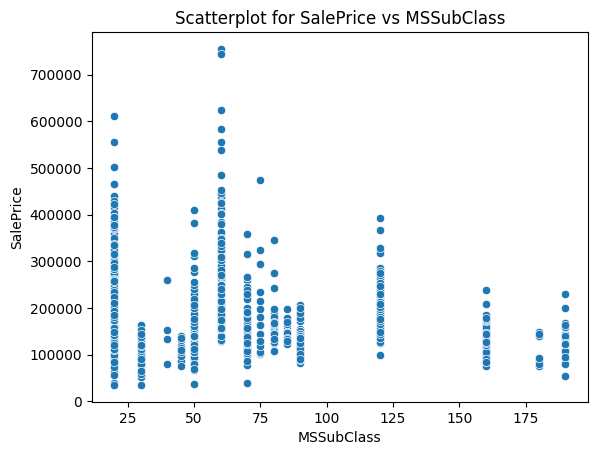

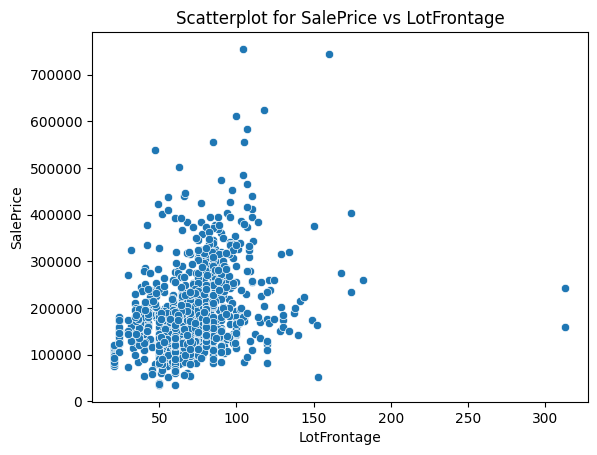

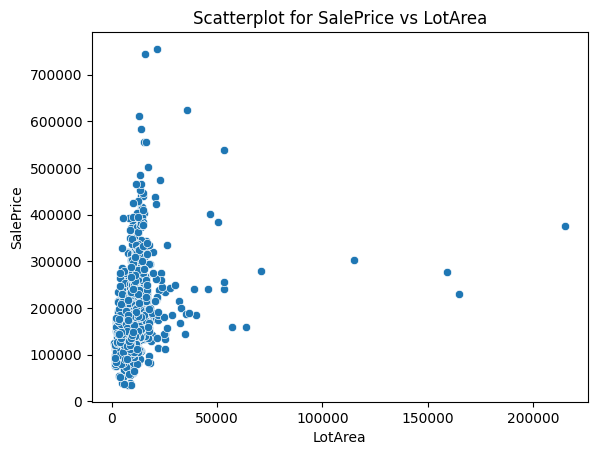

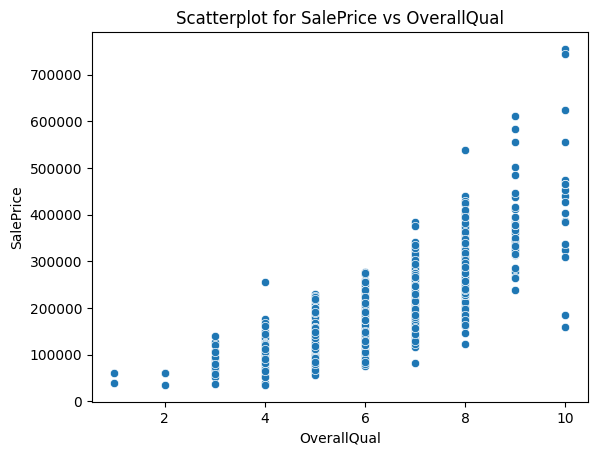

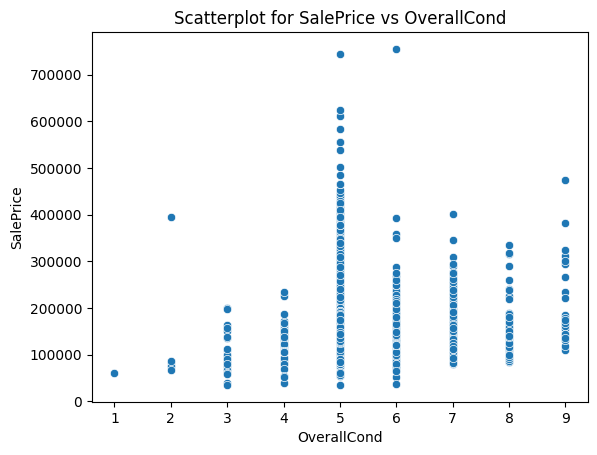

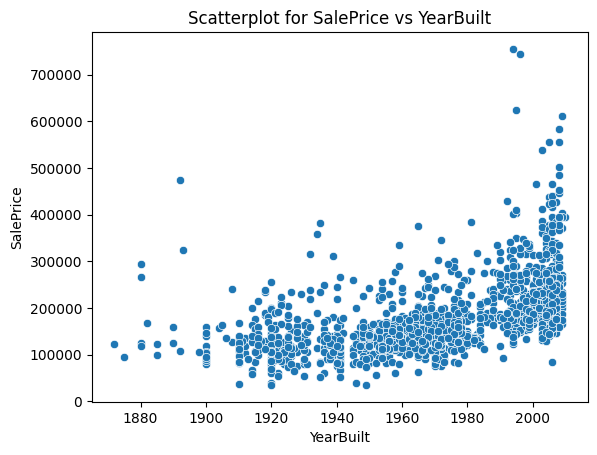

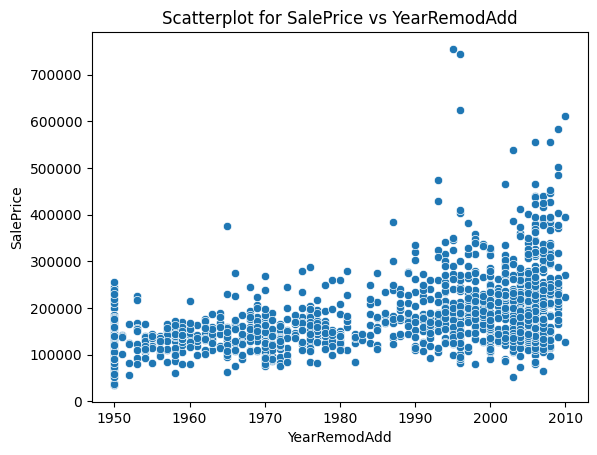

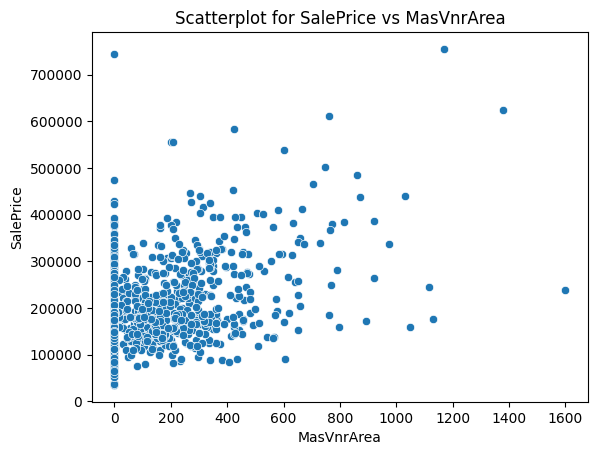

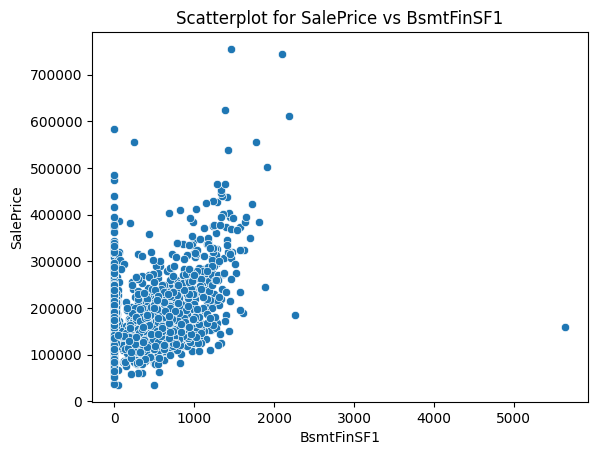

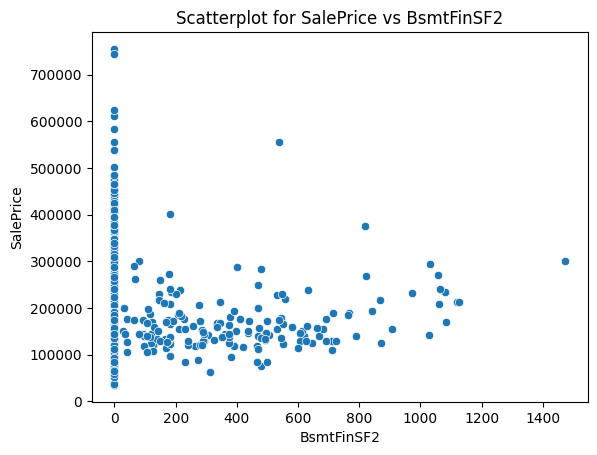

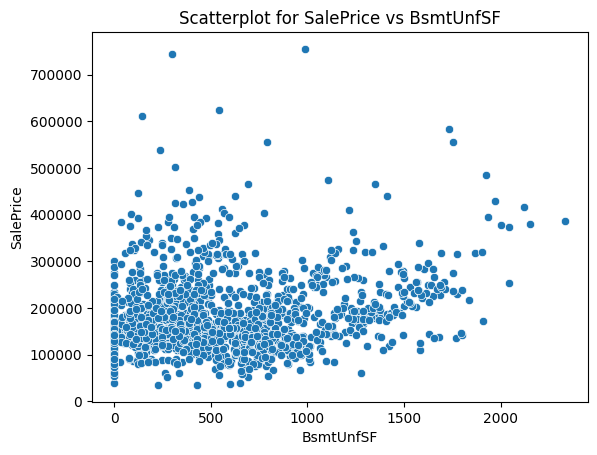

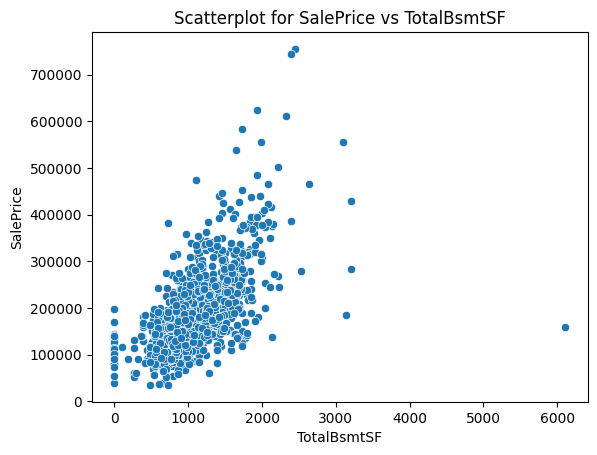

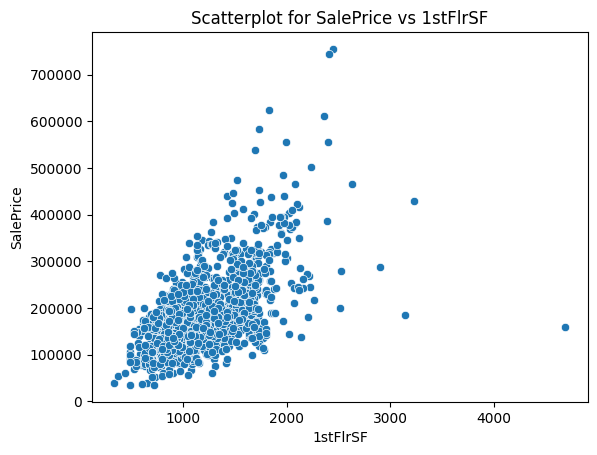

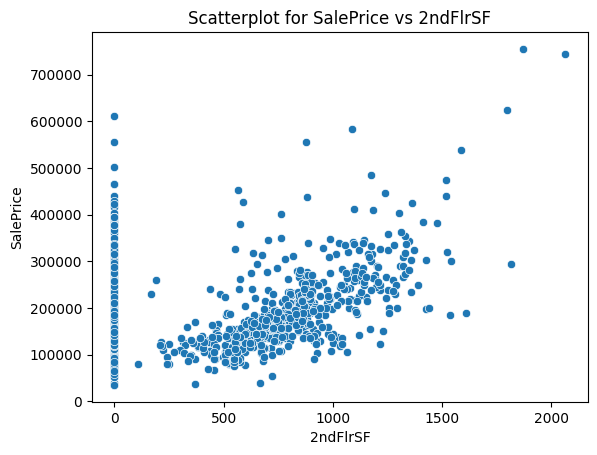

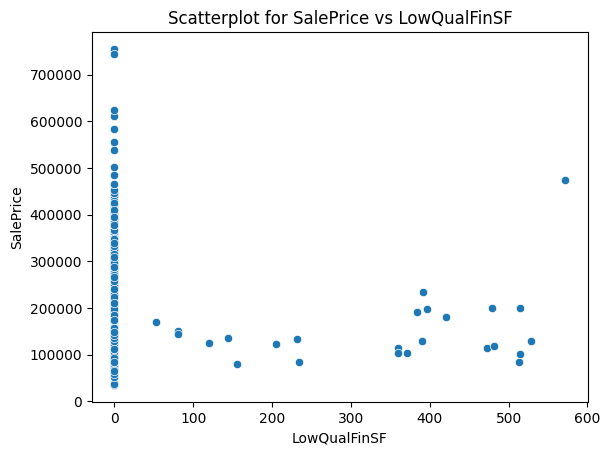

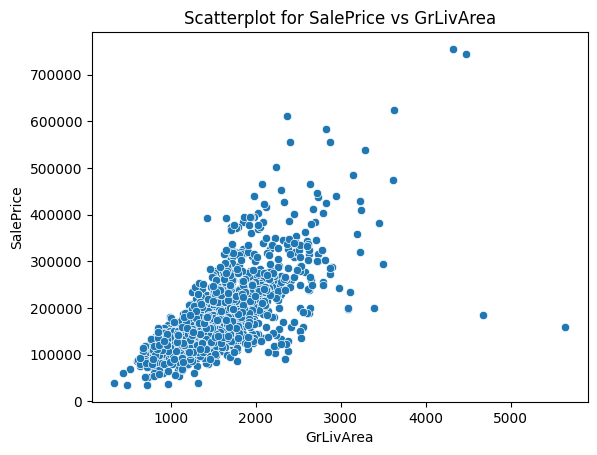

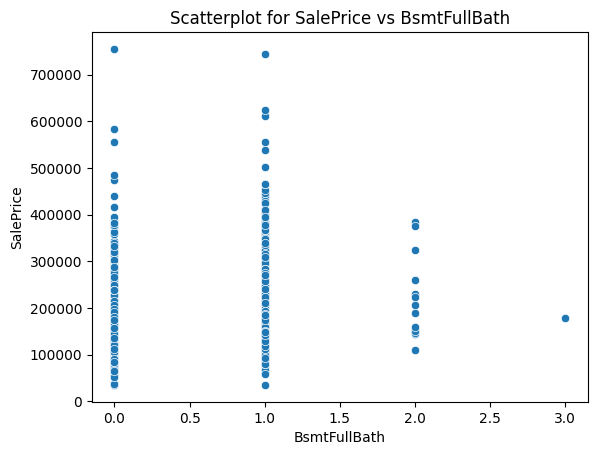

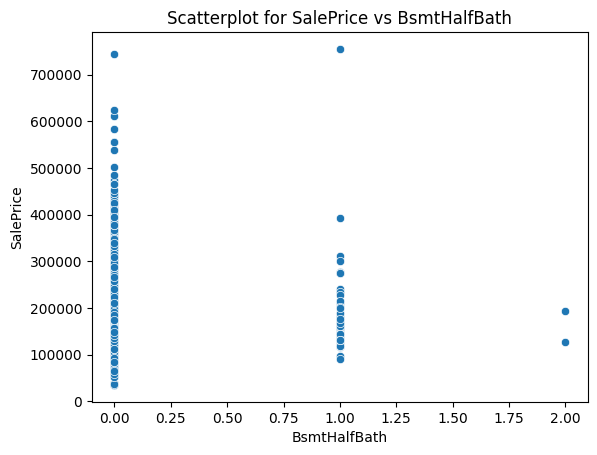

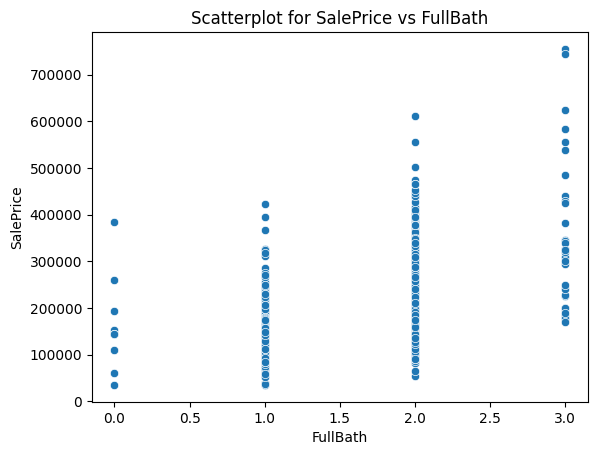

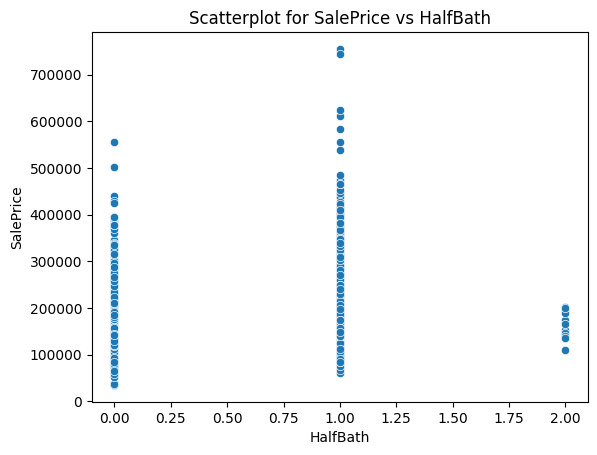

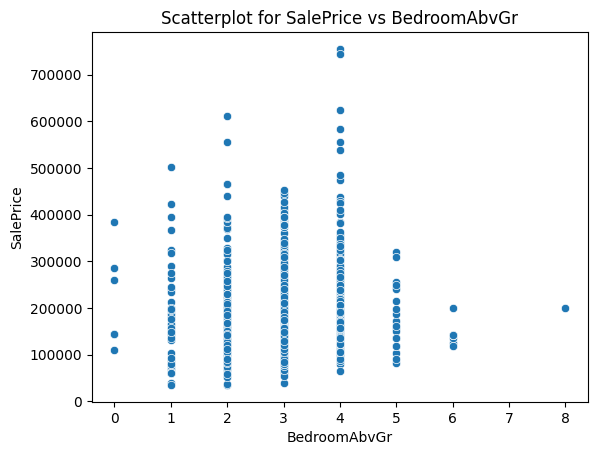

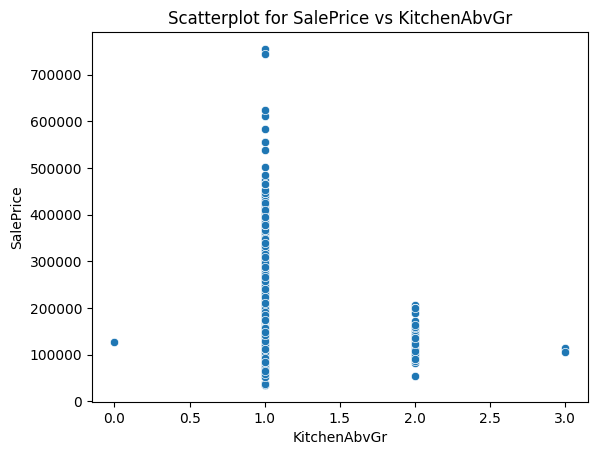

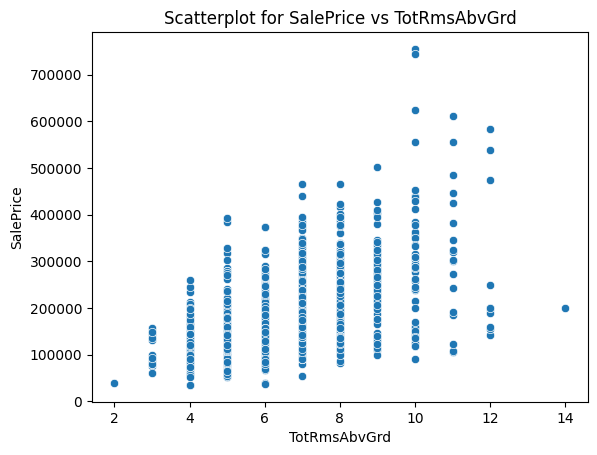

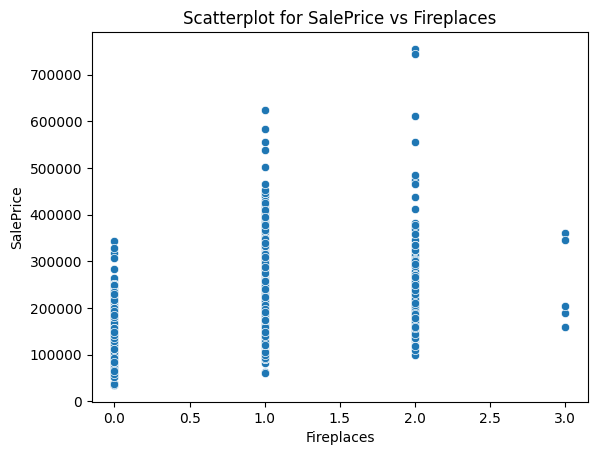

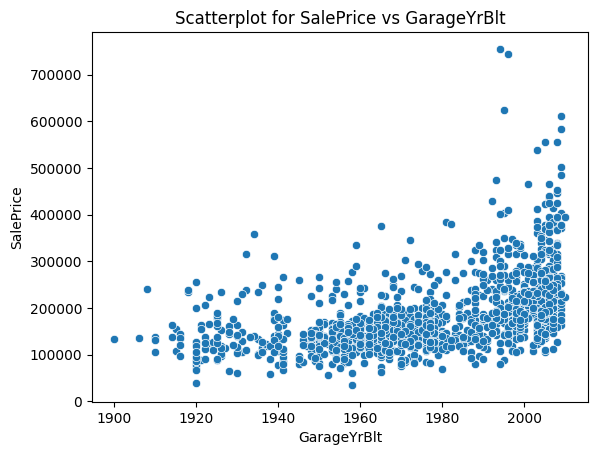

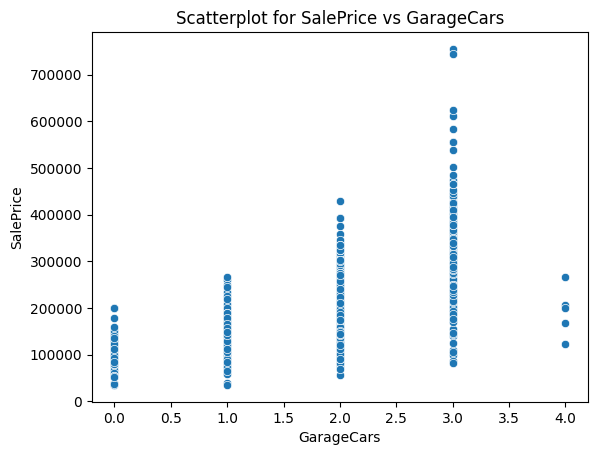

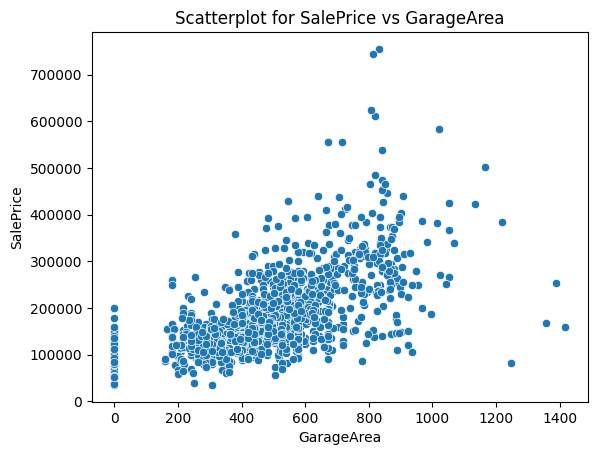

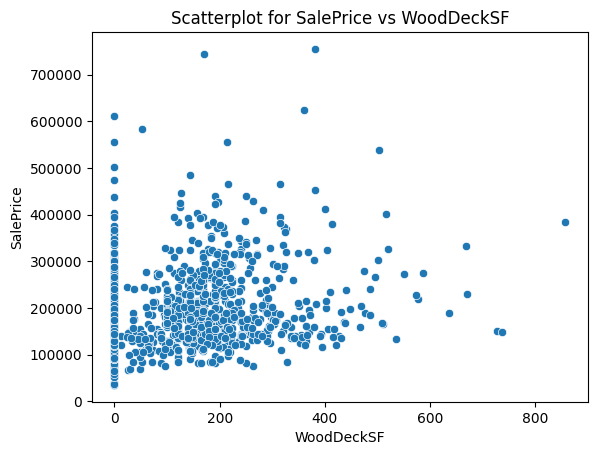

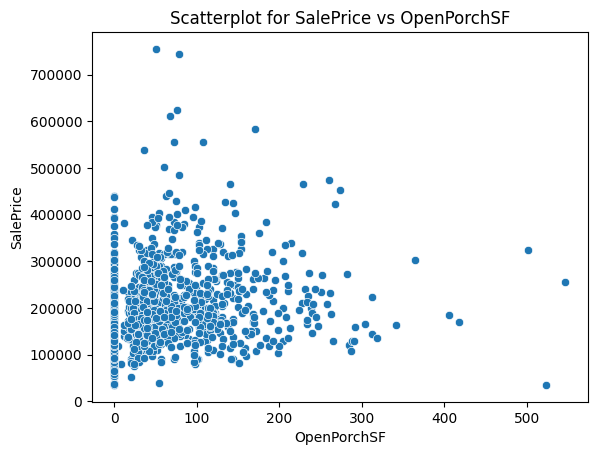

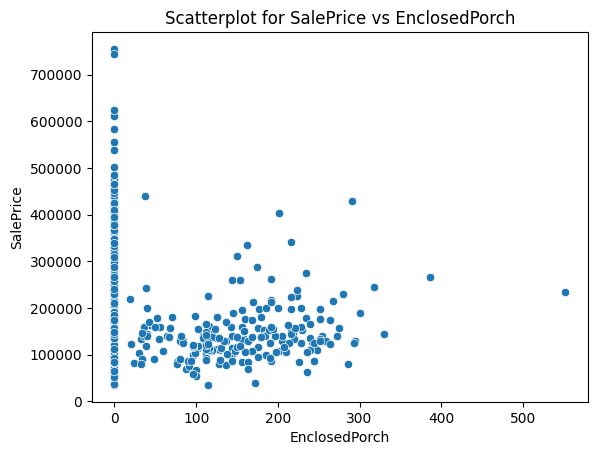

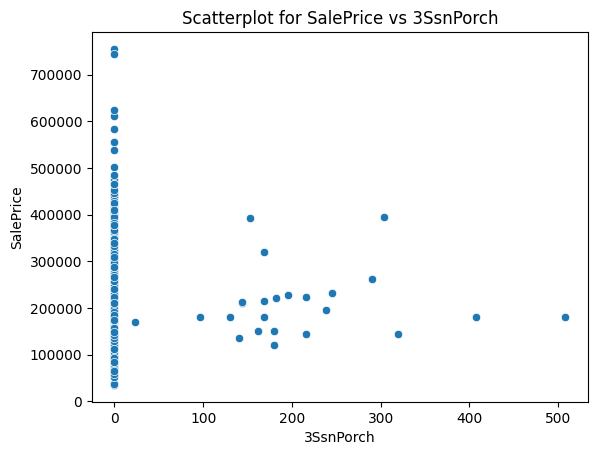

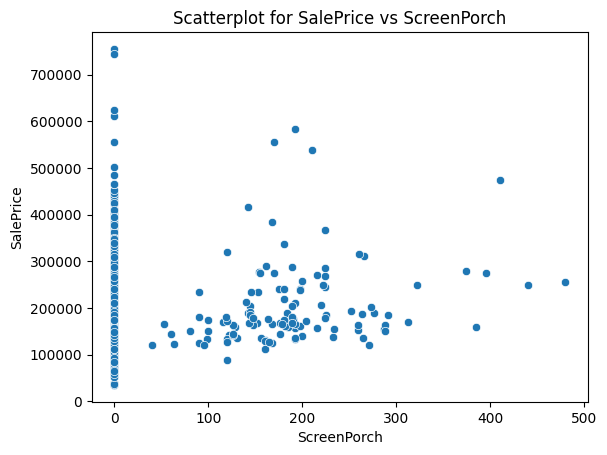

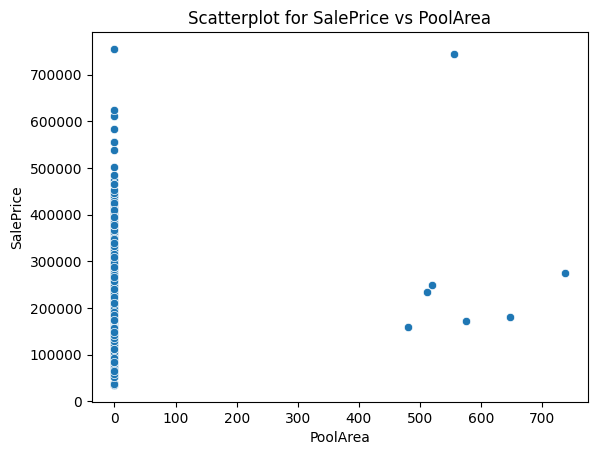

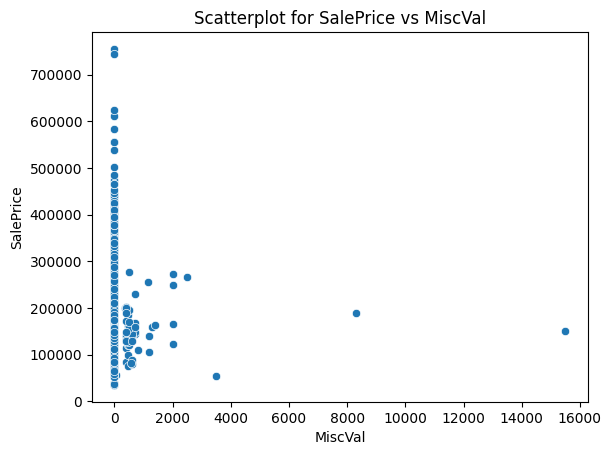

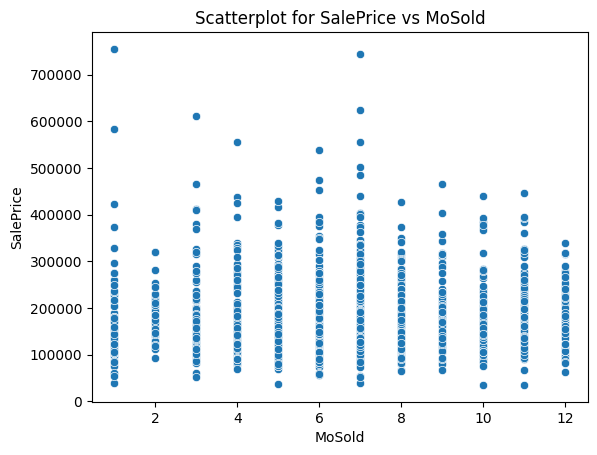

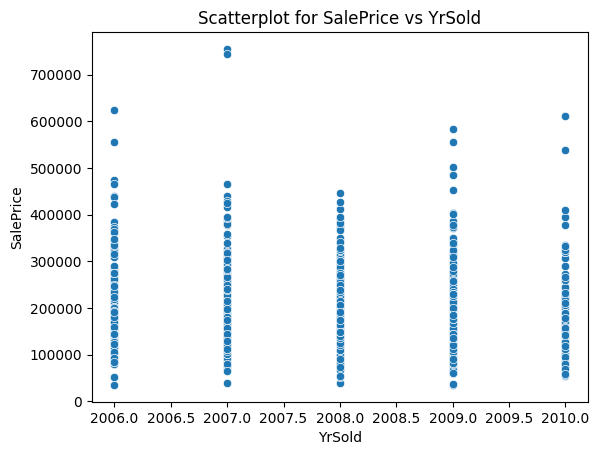

In [15]:
# Scatter plot with respect to SalePrice
for i in con:
    if i!= 'SalePrice':
        sns.scatterplot(data=df,x=i,y='SalePrice')
        plt.title(f'Scatterplot for SalePrice vs {i}')
        plt.show()

## Correlation Heatmap

In [16]:
df[con].corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

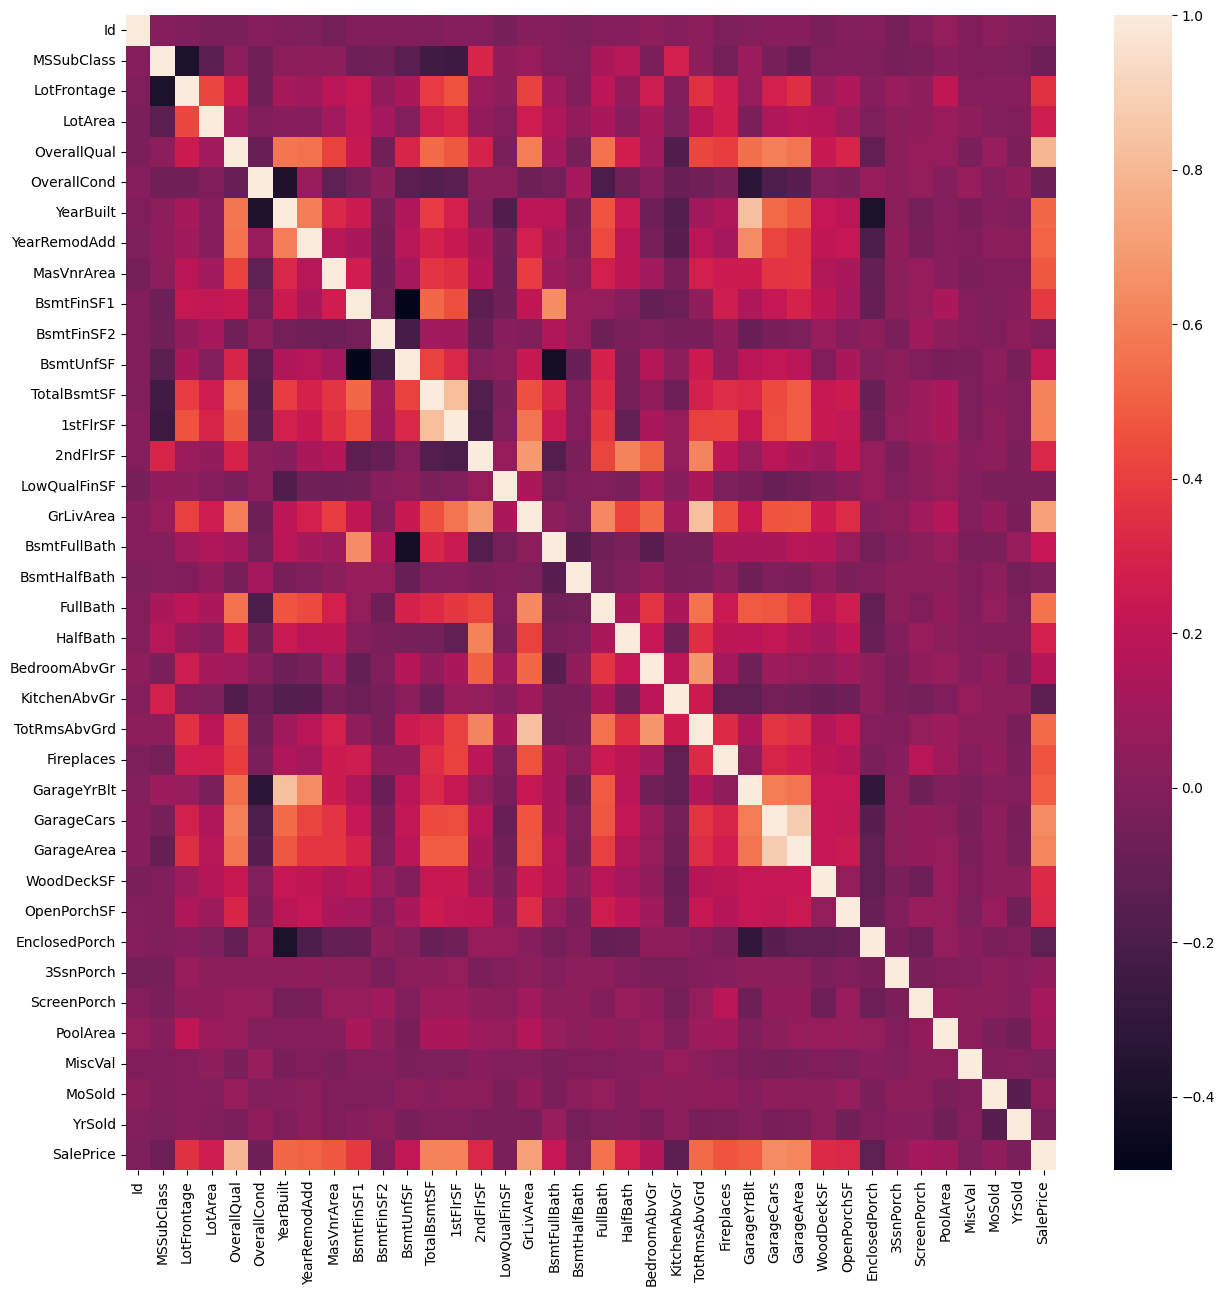

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df[con].corr())
plt.show()

### Categorical vs Continuous Boxplot

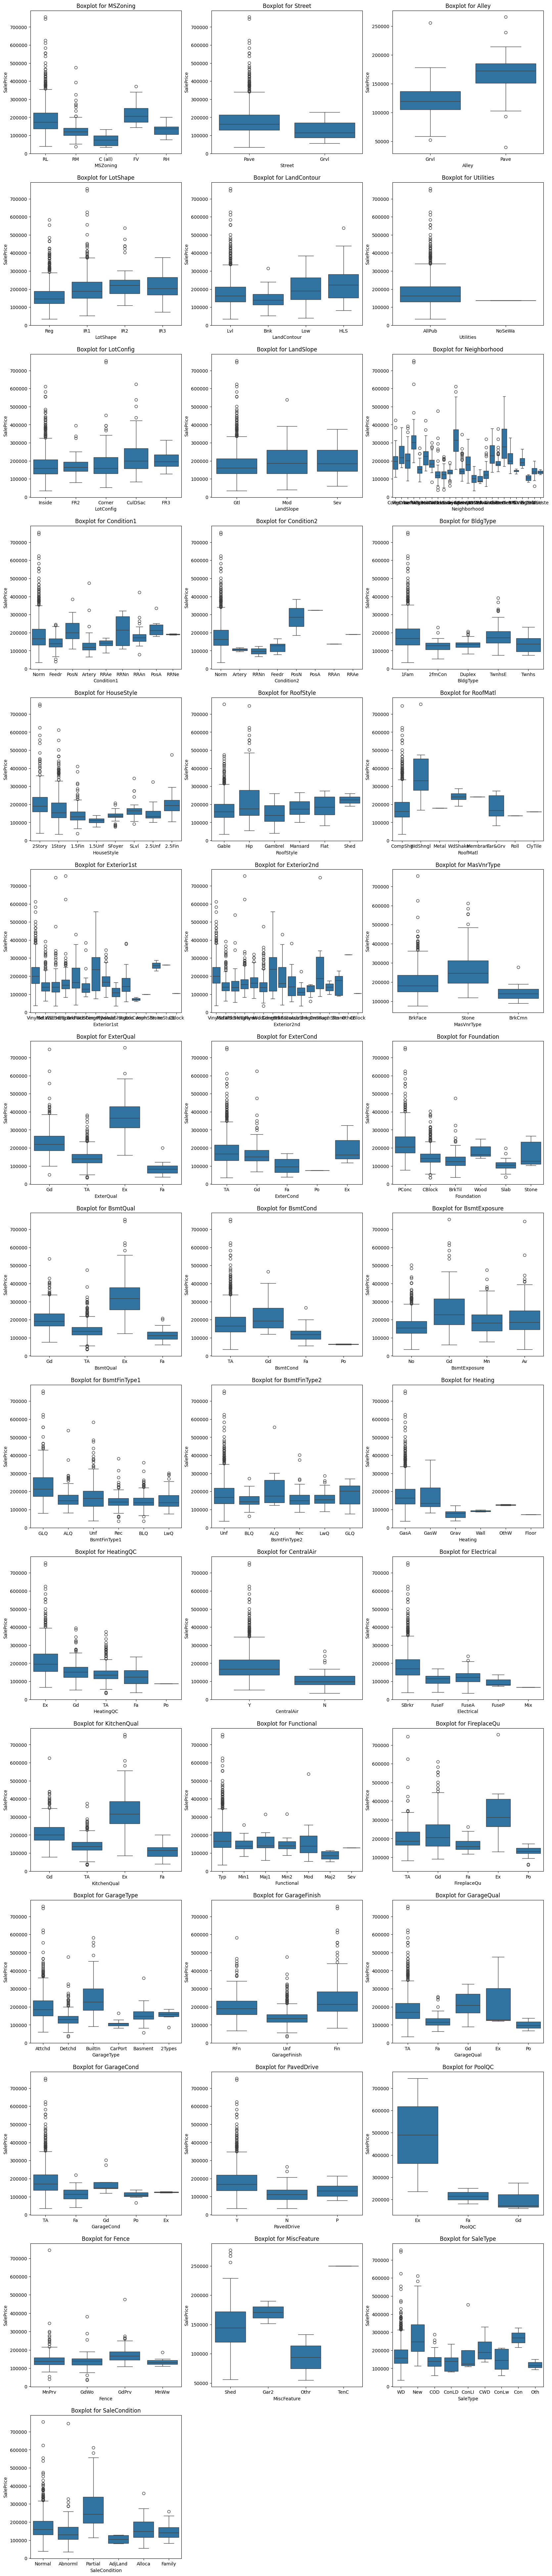

In [18]:
plt.figure(figsize=(20,100))
x=1
for i in cat:
    plt.subplot(15,3,x)
    x=x+1
    sns.boxplot(data=df,x=i,y='SalePrice')
    plt.title(f'Boxplot for {i}')
plt.show()

### Categorical vs Categorical Crosstab

In [19]:
ctab=pd.crosstab(df['ExterQual'], df['ExterCond'])
ctab

ExterCond  Ex  Fa   Gd  Po   TA
ExterQual                      
Ex          1   0    3   0   48
Fa          0   6    0   0    8
Gd          0   0   35   0  453
TA          2  22  108   1  773

<Axes: xlabel='ExterCond', ylabel='ExterQual'>

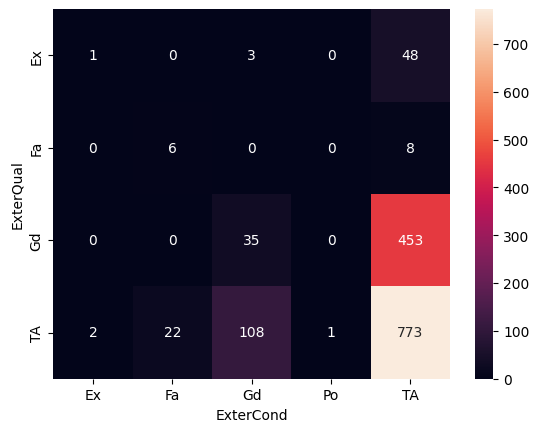

In [20]:
sns.heatmap(ctab,annot=True,fmt='d')

## EDA Completed

## Seperate X and Y

In [21]:
X=df.drop(columns=['Id','SalePrice'])
Y=df[['SalePrice']]

In [22]:
X.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
1         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Lvl    AllPub    Corner  ...           0        0    NaN   NaN   
4         Lvl    AllPub       FR2  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       2    2008        WD         Normal  
1         NaN       0       5    2007        WD         Normal  
2         NaN       0       9    2008        WD         Normal  
3         NaN       0       2    2006        WD        Abnorml  
4         NaN       0      12    2008        WD         Normal  

[5 rows x 79 columns]

In [23]:
Y.head()

SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000

## Create a feature selection Pipeline
1. Categorical features: OrdinalEncoding

In [24]:
cat,con=catconsep(X)

In [25]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [28]:
# Numerical Pipeline
num_pipe1= Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe1= Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                          ('ordinal',OrdinalEncoder())])

# Combine both cat and con features
pre1=ColumnTransformer([('num',num_pipe1,con),
                        ('cat',cat_pipe1,cat)])

In [29]:
X_pre=pre1.fit_transform(X)

In [30]:
X_pre

array([[ 0.07337496, -0.22087509, -0.20714171, ...,  4.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.46031974, -0.09188637, ...,  4.        ,
         8.        ,  4.        ],
       [ 0.07337496, -0.08463612,  0.07347998, ...,  4.        ,
         8.        ,  4.        ],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  2.        ,
         8.        ,  4.        ],
       [-0.87256276, -0.08463612, -0.08016039, ...,  4.        ,
         8.        ,  4.        ],
       [-0.87256276,  0.23325479, -0.05811155, ...,  4.        ,
         8.        ,  4.        ]])

In [31]:
cols=pre1.get_feature_names_out()
cols

array(['num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning',
       'cat__Street', 'cat__Alley', 'cat__LotShape', 'cat__LandContour',
       'cat__Utilities', 'cat__LotConfig', 'cat__LandSlope',
       'cat__Neighborhood', 'cat__Condition1', 'cat__Condition2',
       'cat__BldgTy

In [32]:
X_pre=pd.DataFrame(data=X_pre,columns=cols)
X_pre

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0            0.073375         -0.220875     -0.207142          0.651479   
1           -0.872563          0.460320     -0.091886         -0.071836   
2            0.073375         -0.084636      0.073480          0.651479   
3            0.309859         -0.447940     -0.096897          0.651479   
4            0.073375          0.641972      0.375148          1.374795   
...               ...               ...           ...               ...   
1455         0.073375         -0.357114     -0.260560         -0.071836   
1456        -0.872563          0.687385      0.266407         -0.071836   
1457         0.309859         -0.175462     -0.147810          0.651479   
1458        -0.872563         -0.084636     -0.080160         -0.795151   
1459        -0.872563          0.233255     -0.058112         -0.795151   

      num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0            -0.517200        1.050994           0.878668         0.514104   
1             2.179628        0.156734          -0.429577        -0.570750   
2            -0.517200        0.984752           0.830215         0.325915   
3            -0.517200       -1.863632          -0.720298        -0.570750   
4            -0.517200        0.951632           0.733308         1.366489   
...                ...             ...                ...              ...   
1455         -0.517200        0.918511           0.733308        -0.570750   
1456          0.381743        0.222975           0.151865         0.087911   
1457          3.078570       -1.002492           1.024029        -0.570750   
1458          0.381743       -0.704406           0.539493        -0.570750   
1459          0.381743       -0.207594          -0.962566        -0.570750   

      num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  \
0            0.575425        -0.288653  ...              1.0   
1            1.171992        -0.288653  ...              1.0   
2            0.092907        -0.288653  ...              1.0   
3           -0.499274        -0.288653  ...              5.0   
4            0.463568        -0.288653  ...              1.0   
...               ...              ...  ...              ...   
1455        -0.973018        -0.288653  ...              1.0   
1456         0.759659         0.722112  ...              1.0   
1457        -0.369871        -0.288653  ...              1.0   
1458        -0.865548         6.092188  ...              1.0   
1459         0.847389         1.509640  ...              1.0   

      cat__GarageFinish  cat__GarageQual  cat__GarageCond  cat__PavedDrive  \
0                   1.0              4.0              4.0              2.0   
1                   1.0              4.0              4.0              2.0   
2                   1.0              4.0              4.0              2.0   
3                   2.0              4.0              4.0              2.0   
4                   1.0              4.0              4.0              2.0   
...                 ...              ...              ...              ...   
1455                1.0              4.0              4.0              2.0   
1456                2.0              4.0              4.0              2.0   
1457                1.0              4.0              4.0              2.0   
1458                2.0              4.0              4.0              2.0   
1459                0.0              4.0              4.0              2.0   

      cat__PoolQC  cat__Fence  cat__MiscFeature  cat__SaleType  \
0             3.0         4.0               4.0            8.0   
1             3.0         4.0               4.0            8.0   
2             3.0         4.0               4.0            8.0   
3             3.0         4.0               4.0            8.0   
4             3.0         4.0               4.0            8.0   
...           ...         ...               ...            ...   


## Feature Selection

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr=LinearRegression()
sel=SequentialFeatureSelector(lr,direction='backward')
sel_feature=sel.fit_transform(X_pre,Y)
sel_cols=sel.get_feature_names_out()

In [34]:
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold', 'cat__Alley',
       'cat__LandContour', 'cat__Neighborhood', 'cat__HouseStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__ExterCond', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__BsmtFinType2',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__FireplaceQu', 'cat__GarageCond', 'cat__MiscFeature'],
      dtype=object)

In [35]:
len(sel_cols)

40

In [36]:
sel_cols[0].split('__')[1]


'MSSubClass'

### Split important columns

In [37]:
imp_cols=[]
for i in sel_cols:
    s=i.split('__')[1]
    imp_cols.append(s)

In [38]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Alley',
 'LandContour',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'MiscFeature']

## Get import columns Dataframe

In [39]:
X_imp=X[imp_cols]
X_imp.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0          60     8450            7            5       2003       196.0   
1          20     9600            6            8       1976         0.0   
2          60    11250            7            5       2001       162.0   
3          70     9550            7            5       1915         0.0   
4          60    14260            8            5       2000       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  BsmtQual  BsmtCond  \
0         706           0        150          856  ...        Gd        TA   
1         978           0        284         1262  ...        Gd        TA   
2         486           0        434          920  ...        Gd        TA   
3         216           0        540          756  ...        TA        Gd   
4         655           0        490         1145  ...        Gd        TA   

   BsmtExposure  BsmtFinType2  HeatingQC  KitchenQual  Functional  \
0            No           Unf         Ex           Gd         Typ   
1            Gd           Unf         Ex           TA         Typ   
2            Mn           Unf         Ex           Gd         Typ   
3            No           Unf         Gd           Gd         Typ   
4            Av           Unf         Ex           Gd         Typ   

   FireplaceQu  GarageCond  MiscFeature  
0          NaN          TA          NaN  
1           TA          TA          NaN  
2           TA          TA          NaN  
3           Gd          TA          NaN  
4           TA          TA          NaN  

[5 rows x 40 columns]

### Seprate cat_sel and con_sel

In [40]:
cat_sel,con_sel=catconsep(X_imp)

In [41]:
cat_sel

['Alley',
 'LandContour',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'MiscFeature']

In [42]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

## Final Pipeline Preprocessing
1. Cat:OneHotEncoder

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
# numerical pipeline
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
 
# catagorical pipeline                          
cat_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])

#combine both cat and con                          
pre2=ColumnTransformer([('con',num_pipe2,con_sel),
                        ('cat',cat_pipe2,cat_sel)])


In [49]:
X_sel_pre=pre2.fit_transform(X_imp).toarray()
X_sel_pre

array([[ 0.07337496, -0.20714171,  0.65147924, ...,  0.        ,
         0.        ,  1.        ],
       [-0.87256276, -0.09188637, -0.07183611, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.07337496,  0.07347998,  0.65147924, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ...,  1.        ,
         0.        ,  0.        ],
       [-0.87256276, -0.08016039, -0.79515147, ...,  0.        ,
         0.        ,  1.        ],
       [-0.87256276, -0.05811155, -0.79515147, ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
final_cols=pre2.get_feature_names_out()

In [51]:
final_cols

array(['con__MSSubClass', 'con__LotArea', 'con__OverallQual',
       'con__OverallCond', 'con__YearBuilt', 'con__MasVnrArea',
       'con__BsmtFinSF1', 'con__BsmtFinSF2', 'con__BsmtUnfSF',
       'con__TotalBsmtSF', 'con__1stFlrSF', 'con__GrLivArea',
       'con__BsmtFullBath', 'con__KitchenAbvGr', 'con__TotRmsAbvGrd',
       'con__Fireplaces', 'con__GarageCars', 'con__WoodDeckSF',
       'con__ScreenPorch', 'con__PoolArea', 'con__YrSold',
       'cat__Alley_Grvl', 'cat__Alley_Pave', 'cat__Alley_unknown',
       'cat__LandContour_Bnk', 'cat__LandContour_HLS',
       'cat__LandContour_Low', 'cat__LandContour_Lvl',
       'cat__Neighborhood_Blmngtn', 'cat__Neighborhood_Blueste',
       'cat__Neighborhood_BrDale', 'cat__Neighborhood_BrkSide',
       'cat__Neighborhood_ClearCr', 'cat__Neighborhood_CollgCr',
       'cat__Neighborhood_Crawfor', 'cat__Neighborhood_Edwards',
       'cat__Neighborhood_Gilbert', 'cat__Neighborhood_IDOTRR',
       'cat__Neighborhood_MeadowV', 'cat__Neighborhood_M

In [53]:
X_sel_pre=pd.DataFrame(X_sel_pre,columns=final_cols)

In [54]:
X_sel_pre.head()

con__MSSubClass  con__LotArea  con__OverallQual  con__OverallCond  \
0         0.073375     -0.207142          0.651479         -0.517200   
1        -0.872563     -0.091886         -0.071836          2.179628   
2         0.073375      0.073480          0.651479         -0.517200   
3         0.309859     -0.096897          0.651479         -0.517200   
4         0.073375      0.375148          1.374795         -0.517200   

   con__YearBuilt  con__MasVnrArea  con__BsmtFinSF1  con__BsmtFinSF2  \
0        1.050994         0.514104         0.575425        -0.288653   
1        0.156734        -0.570750         1.171992        -0.288653   
2        0.984752         0.325915         0.092907        -0.288653   
3       -1.863632        -0.570750        -0.499274        -0.288653   
4        0.951632         1.366489         0.463568        -0.288653   

   con__BsmtUnfSF  con__TotalBsmtSF  ...  cat__GarageCond_Fa  \
0       -0.944591         -0.459303  ...                 0.0   
1       -0.641228          0.466465  ...                 0.0   
2       -0.301643         -0.313369  ...                 0.0   
3       -0.061670         -0.687324  ...                 0.0   
4       -0.174865          0.199680  ...                 0.0   

   cat__GarageCond_Gd  cat__GarageCond_Po  cat__GarageCond_TA  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   cat__GarageCond_unknown  cat__MiscFeature_Gar2  cat__MiscFeature_Othr  \
0                      0.0                    0.0                    0.0   
1                      0.0                    0.0                    0.0   
2                      0.0                    0.0                    0.0   
3                      0.0                    0.0                    0.0   
4                      0.0                    0.0                    0.0   

   cat__MiscFeature_Shed  cat__MiscFeature_TenC  cat__MiscFeature_unknown  
0                    0.0                    0.0                       1.0  
1                    0.0                    0.0                       1.0  
2                    0.0                    0.0                       1.0  
3                    0.0                    0.0                       1.0  
4                    0.0                    0.0                       1.0  

[5 rows x 152 columns]

## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xtrain,xtest,ytrain,ytest=train_test_split(X_sel_pre,Y,test_size=0.2,random_state=21)

In [58]:
xtrain.shape

(1168, 152)

In [59]:
xtest.shape

(292, 152)

## Linear Regression Model

In [60]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [61]:
#R2 scoring
model.score(xtrain,ytrain)

0.9248966098876973

In [62]:
# R2 in testing
model.score(xtest,ytest)

-8.456610500764065e+18

### Apply Ridge / Lasso

In [64]:
import numpy as np
alphas1=np.arange(0.1,100,0.1)
alphas1

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [66]:
params={'alpha':alphas1}

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
gscv1=GridSearchCV(ridge,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv1.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='neg_mean_squared_error')

In [68]:
gscv1.best_params_

{'alpha': 21.1}

In [69]:
gscv1.best_score_

-1057856571.1797975

In [70]:
best_ridge=gscv1.best_estimator_
best_ridge

Ridge(alpha=21.1)

In [71]:
best_ridge.score(xtrain,ytrain)

0.8834328983043354

In [72]:
best_ridge.score(xtest,ytest)

0.8318010130939534

In [73]:
from PM2 import evaluate_model

In [75]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_ridge)

Training Results :

MSE : 721425110.64
RMSE: 26859.36
MAE : 16271.00
R2  : 0.8834


Testing Results :

MSE : 1139937009.50
RMSE: 33762.95
MAE : 18047.03
R2  : 0.8318


### Check for lasso

In [84]:
alphas2=np.arange(100,150,0.1)
alphas2

array([100. , 100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7, 100.8,
       100.9, 101. , 101.1, 101.2, 101.3, 101.4, 101.5, 101.6, 101.7,
       101.8, 101.9, 102. , 102.1, 102.2, 102.3, 102.4, 102.5, 102.6,
       102.7, 102.8, 102.9, 103. , 103.1, 103.2, 103.3, 103.4, 103.5,
       103.6, 103.7, 103.8, 103.9, 104. , 104.1, 104.2, 104.3, 104.4,
       104.5, 104.6, 104.7, 104.8, 104.9, 105. , 105.1, 105.2, 105.3,
       105.4, 105.5, 105.6, 105.7, 105.8, 105.9, 106. , 106.1, 106.2,
       106.3, 106.4, 106.5, 106.6, 106.7, 106.8, 106.9, 107. , 107.1,
       107.2, 107.3, 107.4, 107.5, 107.6, 107.7, 107.8, 107.9, 108. ,
       108.1, 108.2, 108.3, 108.4, 108.5, 108.6, 108.7, 108.8, 108.9,
       109. , 109.1, 109.2, 109.3, 109.4, 109.5, 109.6, 109.7, 109.8,
       109.9, 110. , 110.1, 110.2, 110.3, 110.4, 110.5, 110.6, 110.7,
       110.8, 110.9, 111. , 111.1, 111.2, 111.3, 111.4, 111.5, 111.6,
       111.7, 111.8, 111.9, 112. , 112.1, 112.2, 112.3, 112.4, 112.5,
       112.6, 112.7,

In [85]:
params2={'alpha':alphas2}


In [86]:
from sklearn.linear_model import Lasso
lasso=Lasso()
gscv2=GridSearchCV(lasso,param_grid=params2,cv=5,scoring='neg_mean_squared_error')
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([100. , 100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7, 100.8,
       100.9, 101. , 101.1, 101.2, 101.3, 101.4, 101.5, 101.6, 101.7,
       101.8, 101.9, 102. , 102.1, 102.2, 102.3, 102.4, 102.5, 102.6,
       102.7, 102.8, 102.9, 103. , 103.1, 103.2, 103.3, 103.4, 103.5,
       103.6, 103.7, 103.8, 103.9, 104. , 104.1, 104.2, 104.3, 104.4,
       104.5, 104.6, 104.7, 104....
       144.1, 144.2, 144.3, 144.4, 144.5, 144.6, 144.7, 144.8, 144.9,
       145. , 145.1, 145.2, 145.3, 145.4, 145.5, 145.6, 145.7, 145.8,
       145.9, 146. , 146.1, 146.2, 146.3, 146.4, 146.5, 146.6, 146.7,
       146.8, 146.9, 147. , 147.1, 147.2, 147.3, 147.4, 147.5, 147.6,
       147.7, 147.8, 147.9, 148. , 148.1, 148.2, 148.3, 148.4, 148.5,
       148.6, 148.7, 148.8, 148.9, 149. , 149.1, 149.2, 149.3, 149.4,
       149.5, 149.6, 149.7, 149.8, 149.9])},
             scoring='neg_mean_squared_error')

In [87]:
gscv2.best_params_

{'alpha': 119.49999999999889}

In [88]:
gscv2.best_score_

-971416550.2219112

In [89]:
best_lasso=gscv2.best_estimator_
best_lasso

Lasso(alpha=119.49999999999889)

In [90]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_lasso)

Training Results :

MSE : 533933800.02
RMSE: 23107.01
MAE : 15453.46
R2  : 0.9137


Testing Results :

MSE : 1176383312.26
RMSE: 34298.44
MAE : 17085.45
R2  : 0.8264


#### Select Ridge model because of higher R2 Score in Testing

##### Predict the sample_set.csv

In [91]:
xnew=pd.read_csv('sample_set.csv')
xnew.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [93]:
xnew_pre=pre2.transform(xnew).toarray()
xnew_pre

array([[-0.87256276,  0.11076257, -0.79515147, ...,  0.        ,
         0.        ,  1.        ],
       [-0.87256276,  0.37584985, -0.07183611, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07337496,  0.33205282, -0.79515147, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.87256276,  0.95042275, -0.79515147, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66458604, -0.00759964, -0.79515147, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.07337496, -0.08918038,  0.65147924, ...,  0.        ,
         0.        ,  1.        ]])

In [94]:
xnew_pre=pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

con__MSSubClass  con__LotArea  con__OverallQual  con__OverallCond  \
0        -0.872563      0.110763         -0.795151          0.381743   
1        -0.872563      0.375850         -0.071836          0.381743   
2         0.073375      0.332053         -0.795151         -0.517200   
3         0.073375     -0.054002         -0.071836          0.381743   
4         1.492282     -0.552407          1.374795         -0.517200   

   con__YearBuilt  con__MasVnrArea  con__BsmtFinSF1  con__BsmtFinSF2  \
0       -0.340077        -0.570750         0.053428         0.604293   
1       -0.439440         0.027027         1.051363        -0.288653   
2        0.852269        -0.570750         0.761852        -0.288653   
3        0.885390        -0.460051         0.347326        -0.288653   
4        0.686666        -0.570750        -0.396190        -0.288653   

   con__BsmtUnfSF  con__TotalBsmtSF  ...  cat__GarageCond_Fa  \
0       -0.672923         -0.400017  ...                 0.0   
1       -0.365032          0.619239  ...                 0.0   
2       -0.974021         -0.295127  ...                 0.0   
3       -0.550672         -0.299687  ...                 0.0   
4        1.018211          0.507509  ...                 0.0   

   cat__GarageCond_Gd  cat__GarageCond_Po  cat__GarageCond_TA  \
0                 0.0                 0.0                 1.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 1.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 1.0   

   cat__GarageCond_unknown  cat__MiscFeature_Gar2  cat__MiscFeature_Othr  \
0                      0.0                    0.0                    0.0   
1                      0.0                    1.0                    0.0   
2                      0.0                    0.0                    0.0   
3                      0.0                    0.0                    0.0   
4                      0.0                    0.0                    0.0   

   cat__MiscFeature_Shed  cat__MiscFeature_TenC  cat__MiscFeature_unknown  
0                    0.0                    0.0                       1.0  
1                    0.0                    0.0                       0.0  
2                    0.0                    0.0                       1.0  
3                    0.0                    0.0                       1.0  
4                    0.0                    0.0                       1.0  

[5 rows x 152 columns]

In [95]:
pred=best_ridge.predict(xnew_pre)
pred

array([[117957.27849908],
       [147215.44995686],
       [168597.27082589],
       ...,
       [183992.45622194],
       [102850.52090076],
       [225497.96366346]])

### Save the predictions to dataframe

In [98]:
df_final=xnew[['Id']]
df_final

Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]

In [99]:
df_final['SalePrice']=pred
df_final

Id      SalePrice
0     1461  117957.278499
1     1462  147215.449957
2     1463  168597.270826
3     1464  181163.837103
4     1465  196802.638046
...    ...            ...
1454  2915   84932.740677
1455  2916   80932.846515
1456  2917  183992.456222
1457  2918  102850.520901
1458  2919  225497.963663

[1459 rows x 2 columns]

### Check the sales price distribution

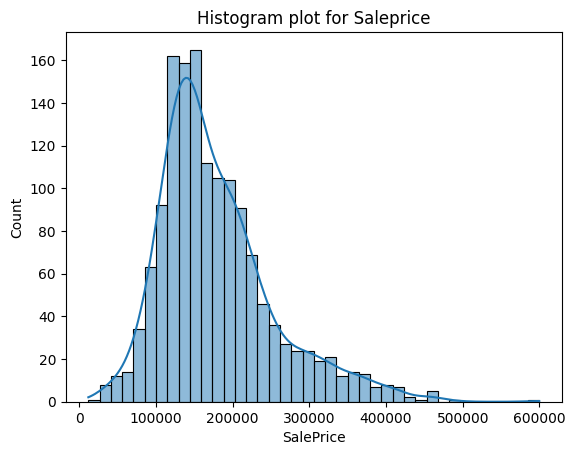

In [100]:
sns.histplot(data=df_final,x='SalePrice',kde=True)
plt.title('Histogram plot for Saleprice')
plt.show()

### Save the file to results.csv

In [101]:
df_final.to_csv('Result.csv',index=False)